In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

2023-06-04 22:08:35.733644: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Cargar el dataset
fichero_DemandaDiaria = "/Users/administrador/Desktop/Ingenieria Informatica UPSA/Curso 3/Prediccion Demanda Electrica/Datos/DemandaDiaria_KWh_2015-2021.csv"
data = pd.read_csv(fichero_DemandaDiaria, sep=";")
data['Date'] = pd.to_datetime(data['Date'])  # Convertir la columna de fecha a tipo datetime
data = data.set_index('Date')  # Establecer la columna de fecha como índice

In [4]:
# Preprocesamiento de los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Load'].values.reshape(-1, 1))
print(data['Load'].values.reshape(-1, 1) )

[[5686686080]
 [6752007030]
 [6605796020]
 ...
 [6189154460]
 [6148808710]
 [5721799170]]


In [5]:
# Dividir los datos en entrenamiento y prueba
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size:, :]

In [6]:
# Crear secuencias de entrenamiento
def create_sequences(dataset, sequence_length):
    X, y = [], []
    for i in range(len(dataset) - sequence_length):
        X.append(dataset[i:i + sequence_length, 0])
        y.append(dataset[i + sequence_length, 0])
    return np.array(X), np.array(y)

sequence_length = 10  # Longitud de la secuencia de entrada
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)
print( y_train.shape )

(2035,)


In [7]:
# Reshape de los datos para LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print( X_train.shape[1] )

10


In [8]:
# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

2023-06-04 22:09:10.010153: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-04 22:09:10.012045: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-04 22:09:10.013986: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [9]:
# Compilar y entrenar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


2023-06-04 22:09:17.290355: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-04 22:09:17.291892: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-04 22:09:17.293291: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

64/64 [==============================] - 3s 7ms/step - loss: 0.0513
Epoch 2/50
64/64 [==============================] - 1s 10ms/step - loss: 0.0242
Epoch 3/50
64/64 [==============================] - 0s 7ms/step - loss: 0.0243
Epoch 4/50
64/64 [==============================] - 0s 8ms/step - loss: 0.0243
Epoch 5/50
64/64 [==============================] - 0s 8ms/step - loss: 0.0240
Epoch 6/50
64/64 [==============================] - 0s 8ms/step - loss: 0.0239
Epoch 7/50
64/64 [==============================] - 0s 8ms/step - loss: 0.0238
Epoch 8/50
64/64 [==============================] - 0s 7ms/step - loss: 0.0238
Epoch 9/50
64/64 [==============================] - 0s 7ms/step - loss: 0.0237
Epoch 10/50
64/64 [==============================] - 0s 7ms/step - loss: 0.0235
Epoch 11/50
64/64 [==============================] - 0s 7ms/step - loss: 0.0208
Epoch 12/50
64/64 [==============================] - 0s 7ms/step - loss: 0.0169
Epoch 13/50
64/64 [==============================] - 1s 8ms

In [10]:
# Realizar predicciones
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
print( train_predictions[1:10])

2023-06-04 22:09:50.076012: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-04 22:09:50.078333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-04 22:09:50.080465: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16/16 [==============================] - 0s 3ms/step
[[0.43044212]
 [0.8533099 ]
 [0.7956683 ]
 [0.77090186]
 [0.7633539 ]
 [0.5767863 ]
 [0.43476263]
 [0.7534813 ]
 [0.8814119 ]]


In [11]:
# Deshacer la escala de las predicciones
train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
y_test_unscaled = scaler.inverse_transform( y_test.reshape(-1,1))
y_train_unscaled = scaler.inverse_transform( y_train.reshape(-1,1))
print(y_test_unscaled[1:20])
print(test_predictions[1:20])

[[6.65065892e+09]
 [6.81563633e+09]
 [6.85366789e+09]
 [6.93872106e+09]
 [6.33543901e+09]
 [5.85532384e+09]
 [6.90025949e+09]
 [7.28540090e+09]
 [7.46464626e+09]
 [7.51890561e+09]
 [7.28304835e+09]
 [5.96089677e+09]
 [5.37314504e+09]
 [6.40486467e+09]
 [6.60798197e+09]
 [6.72011606e+09]
 [6.79759100e+09]
 [6.85429181e+09]
 [6.16488634e+09]]
[[6.5457510e+09]
 [6.7098148e+09]
 [6.7797243e+09]
 [6.6718254e+09]
 [6.2753838e+09]
 [5.7952067e+09]
 [6.6287309e+09]
 [7.1731973e+09]
 [7.3203154e+09]
 [7.4167788e+09]
 [7.2612675e+09]
 [6.6534733e+09]
 [5.9356836e+09]
 [6.8276613e+09]
 [6.6414223e+09]
 [6.5334789e+09]
 [6.6910444e+09]
 [6.8436593e+09]
 [6.5153930e+09]]


In [12]:
# Calcular el error cuadrático medio
train_rmse = np.sqrt(np.mean((y_train_unscaled - train_predictions) ** 2))
test_rmse = np.sqrt(np.mean((y_test_unscaled - test_predictions) ** 2))
print('Error cuadrático medio en entrenamiento:', train_rmse)
print('Error cuadrático medio en prueba:', test_rmse)

Error cuadrático medio en entrenamiento: 279639248.6144751
Error cuadrático medio en prueba: 289143173.1550617


In [13]:
# Calcular el error absoluto medio (MAE)
train_mae = np.mean(np.abs(y_train_unscaled - train_predictions))
test_mae = np.mean(np.abs(y_test_unscaled - test_predictions))
print('Error absoluto medio en entrenamiento:', train_mae)
print('Error absoluto medio en prueba:', test_mae)

Error absoluto medio en entrenamiento: 186851581.4889435
Error absoluto medio en prueba: 187818441.58565736


In [14]:
# Calcular el error absoluto relativo medio (MRAE)
mean_load = data['Load'].mean()
train_mrae = np.mean(np.abs((y_train_unscaled - train_predictions) / mean_load))
test_mrae = np.mean(np.abs((y_test_unscaled - test_predictions) / mean_load))
print('Error absoluto relativo medio en entrenamiento:', train_mrae)
print('Error absoluto relativo medio en prueba:', test_mrae)

Error absoluto relativo medio en entrenamiento: 0.027581821499325785
Error absoluto relativo medio en prueba: 0.027724543131060868


(502,)
(502, 1)


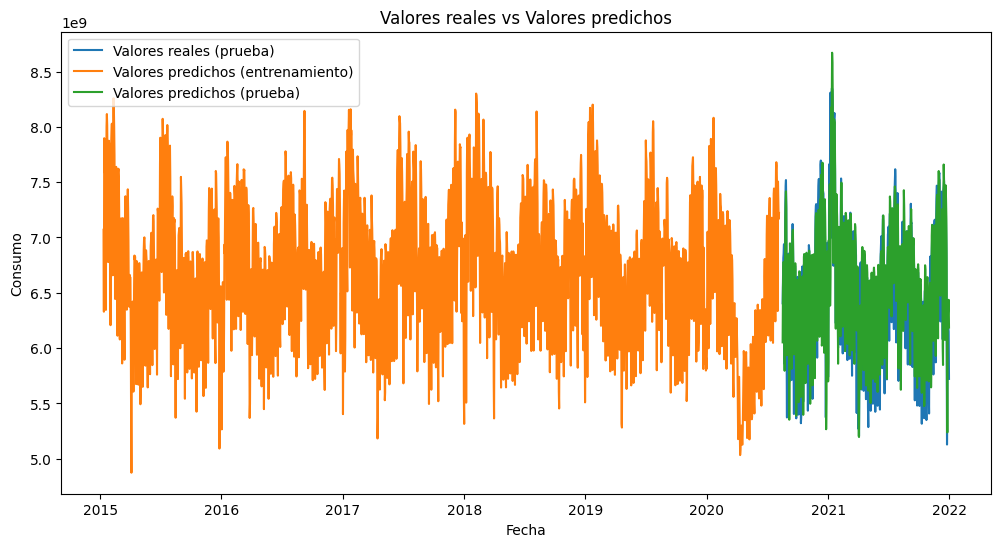

In [15]:
# Ajustar las dimensiones de los índices de fecha y las predicciones de prueba
#test_index_adjusted = data.index[train_size + sequence_length:][sequence_length:]
test_index_adjusted = data.index[train_size:][sequence_length:]
print(test_index_adjusted.shape)
print( test_predictions.shape)

# Representar gráficamente los valores reales y predichos
plt.figure(figsize=(12, 6))
plt.plot(test_index_adjusted, data.loc[test_index_adjusted, 'Load'], label='Valores reales (prueba)')
plt.plot(data.index[sequence_length:train_size], train_predictions, label='Valores predichos (entrenamiento)')
plt.plot(test_index_adjusted, test_predictions, label='Valores predichos (prueba)')

plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.title('Valores reales vs Valores predichos')
plt.legend()
plt.show()

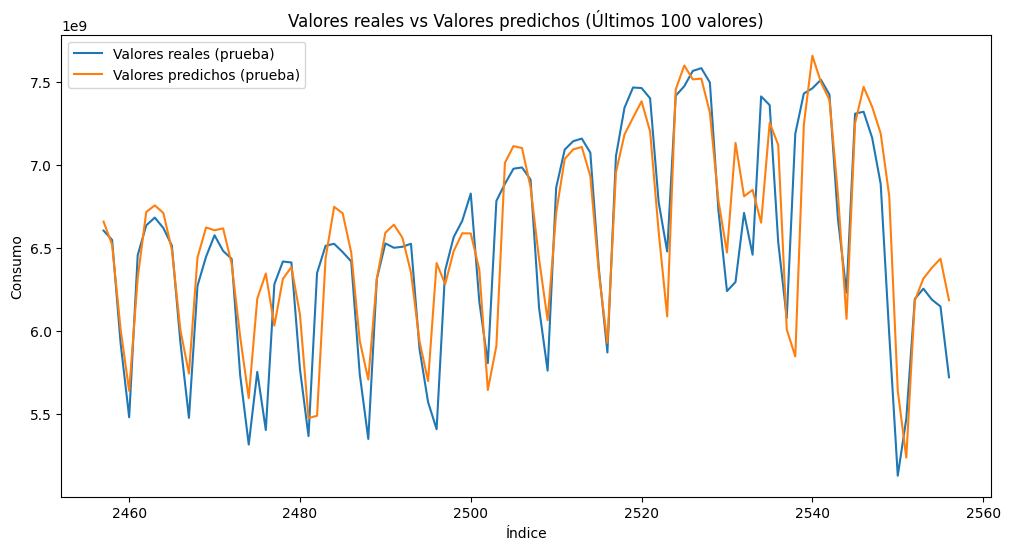

In [28]:
# Obtener los últimos valores reales y predichos
last_values = 100  # Número de valores finales a mostrar
test_values = data['Load'][-last_values:]
train_pred_values = train_predictions[-last_values:].flatten()
test_pred_values = test_predictions[-last_values:].flatten()

# Crear índices para los últimos valores
index_range = range(len(data) - last_values, len(data))

# Representar gráficamente los últimos valores reales y predichos
plt.figure(figsize=(12, 6))
plt.plot(index_range, test_values, label='Valores reales (prueba)')
plt.plot(index_range, test_pred_values, label='Valores predichos (prueba)')

plt.xlabel('Índice')
plt.ylabel('Consumo')
plt.title('Valores reales vs Valores predichos (Últimos {} valores)'.format(last_values))
plt.legend()
plt.show()
